<a href="https://colab.research.google.com/github/littlewood1030/Math_Eu/blob/main/chap4_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame

import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3
np.random.seed(0)

In [2]:
#練習問題4-1
coin_data = ([0,1])
coin_try = 1000
coin_rolls = np.random.choice(coin_data,coin_try)

for i in range(0,2):
    p = len(coin_rolls[coin_rolls==i])/coin_try
    print(i,'が出る確率',p)

0 が出る確率 0.496
1 が出る確率 0.504


In [3]:
#練習問題4-2
zentai = 1000
atari = 100
#A君があたりを引く確率pa
pa = atari/zentai
#続けてB君があたりを引く確率
pb = (atari-1)/(zentai-1)
('A君B君が当たる確率は',pa,pb)

('A君B君が当たる確率は', 0.100, 0.099)

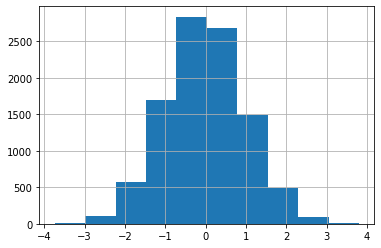

In [4]:
#練習問題4－4
#分散を標準偏差にする
std = np.sqrt(1)
x = np.random.normal(0,std,10000)
plt.hist(x)
plt.grid(True)


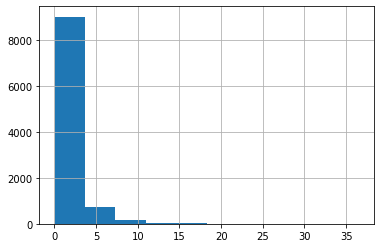

In [5]:
#練習問題4－5
#分散を標準偏差にする
std = np.sqrt(1)
x = np.random.lognormal(0,std,10000)
plt.hist(x)
plt.grid(True)


In [6]:
import requests
import zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [8]:
student_data_math = pd.read_csv('student-mat.csv',sep = ';')

In [9]:
student_data_por = pd.read_csv('student-por.csv',sep = ';')

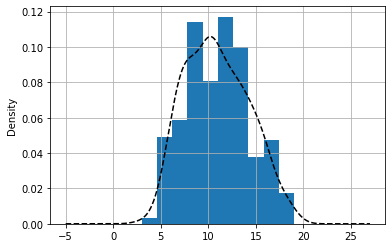

In [10]:
#カーネル密度推定
student_data_math.G1.plot(kind='kde',style='k--')
student_data_math.G1.hist(density = True)
plt.grid(True)

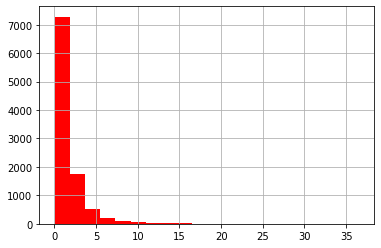

In [11]:
#練習問題4－7
for df, c in zip([5,25,50],'bgr'):
    np.random.chisquare(df,1000)
    plt.hist(x,20,color=c)
    plt.grid(True)

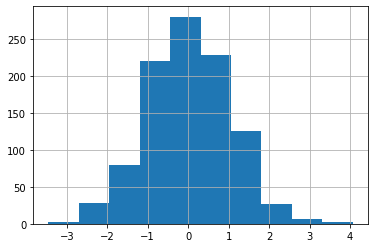

In [12]:
#練習問題4－8
x = np.random.standard_t(100,1000)
plt.hist(x)
plt.grid(True)

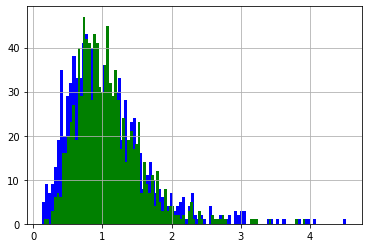

In [13]:
#練習問題4－9
for df,c in zip([(10,30),(20,25)],'bgr'):
  x = np.random.f(df[0],df[1],1000)
  plt.hist(x,100,color=c)
  plt.grid(True)

In [14]:
#練習問題4-13
student_data_merge = pd.merge(student_data_math,student_data_por
                              ,on = ['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob',
                                  'Fjob','reason' ,'nursery','internet'],
                              suffixes =('_math','_por'))

print('数学の出欠',student_data_merge.G2_math.mean())
print('ポルトガル語の出欠',student_data_merge.G2_por.mean())

from scipy import stats
t,p = stats.ttest_rel(student_data_merge.G2_math,student_data_merge.G2_por)
print('G2のp値 = ',p)
t,q = stats.ttest_rel(student_data_merge.G3_math,student_data_merge.G3_por)
print('G3のp値 = ',q)

数学の出欠 10.712041884816754
ポルトガル語の出欠 12.238219895287958
G2のp値 =  4.0622824801348043e-19
G3のp値 =  5.561492113688385e-21


G2,G3ともにp値が優位水準を1%としても満たさないので、統計的に差があると考えられる

In [15]:
#総合問題第4章(1)(2)
student_data_merge = pd.merge(student_data_math,student_data_por
                              ,on = ['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob',
                                  'Fjob','reason' ,'nursery','internet'],
                              suffixes =('_math','_por'))

print('数学の出欠',student_data_merge.absences_math.mean())
print('ポルトガル語の出欠',student_data_merge.absences_por.mean())
print('数学の勉強時間',student_data_merge.studytime_math.mean())
print('ポルトガル語の勉強時間',student_data_merge.studytime_por.mean())

from scipy import stats
t,p = stats.ttest_rel(student_data_merge.absences_math,student_data_merge.absences_por)
print('出欠のp値 = ',p)
t,q = stats.ttest_rel(student_data_merge.studytime_math,student_data_merge.studytime_por)
print('勉強時間のp値 = ',q)

数学の出欠 5.319371727748691
ポルトガル語の出欠 3.6727748691099475
数学の勉強時間 2.0340314136125652
ポルトガル語の勉強時間 2.0392670157068062
出欠のp値 =  2.3441656888384195e-06
勉強時間のp値 =  0.5643842756976525


出欠のp値は有意差1%としても満たさないので、統計的に差があると考えられる。
一方、勉強時間のp値は有意差5%としても満たさないので、統計的に差がないと考えられる。